In [1]:
import platform
import os

import matplotlib.pyplot as plt
import pandas as pd

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dn277127':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_strip'

# file_nums = list(range(0, 6))
file_nums = 'all'

noise_threshold_sigmas = 8

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:24<00:00,  9.75it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [5, 6, 7, 8]
HV: {'drift': 600, 'resist_1': 410}
Reading in data...


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Read in data shape: (217827, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.38it/s]


Fitting time: 3.729870080947876 s
Processed sub-chunk 1/1
Processed chunk 1/3


100%|██████████| 100/100 [00:21<00:00,  4.60it/s]


Read in data shape: (219790, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.61it/s]


Fitting time: 4.1098408699035645 s
Processed sub-chunk 1/1
Processed chunk 2/3


100%|██████████| 37/37 [00:08<00:00,  4.62it/s]


Read in data shape: (81718, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 13.04it/s]


Fitting time: 1.848811388015747 s
Processed sub-chunk 1/1
Processed chunk 3/3
Getting hits...
Hits shape: (519335, 256)


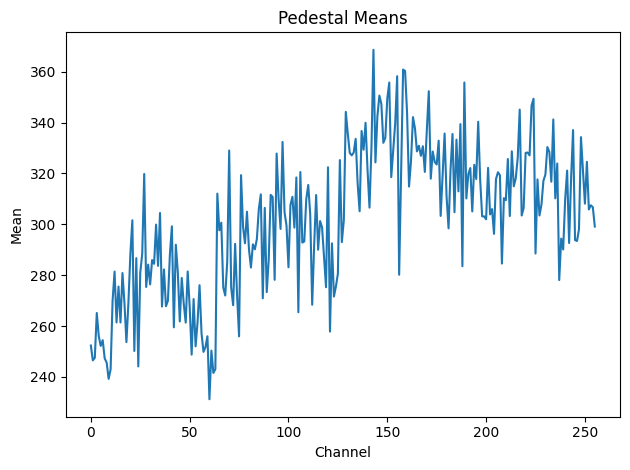

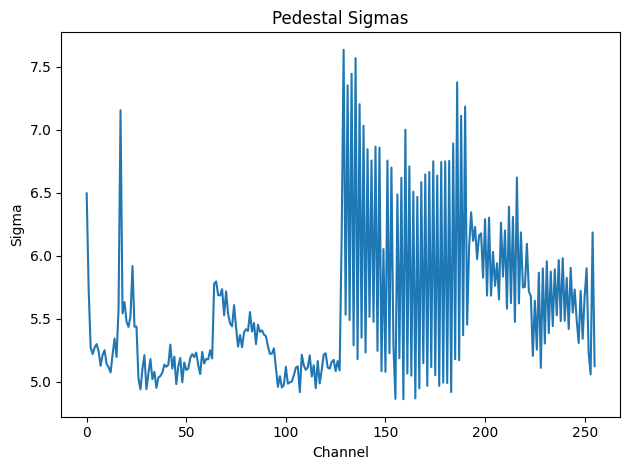

In [6]:
det.dream_data.plot_pedestals()

/home/dylan/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:699: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


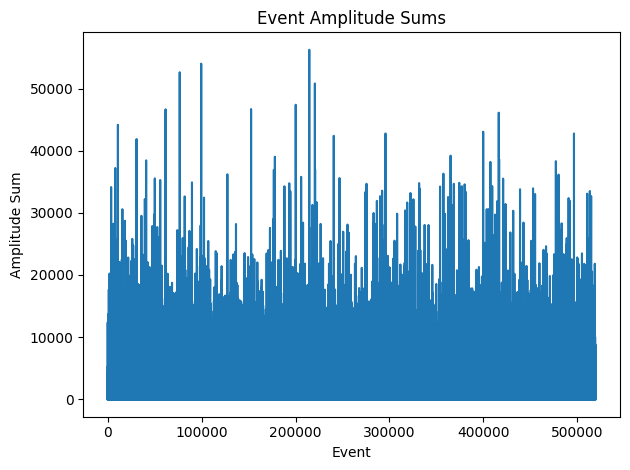

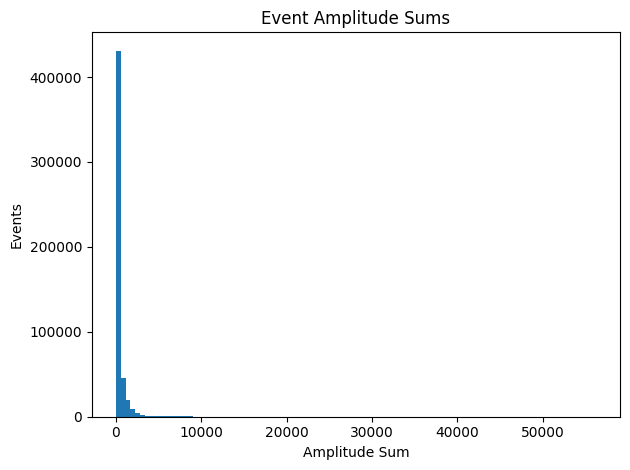

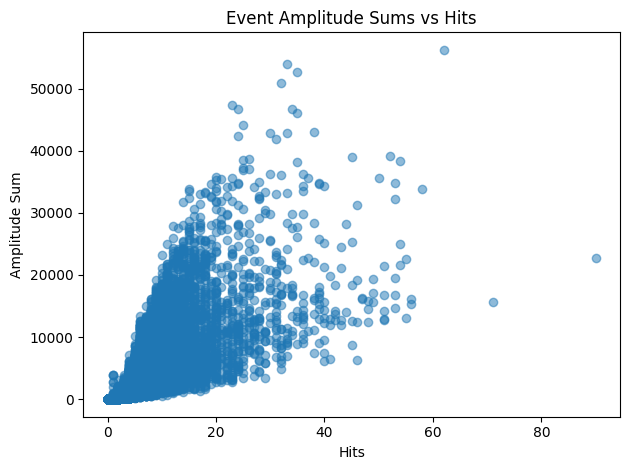

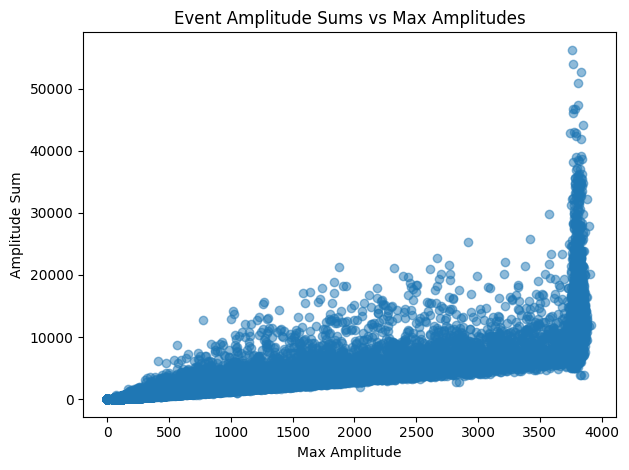

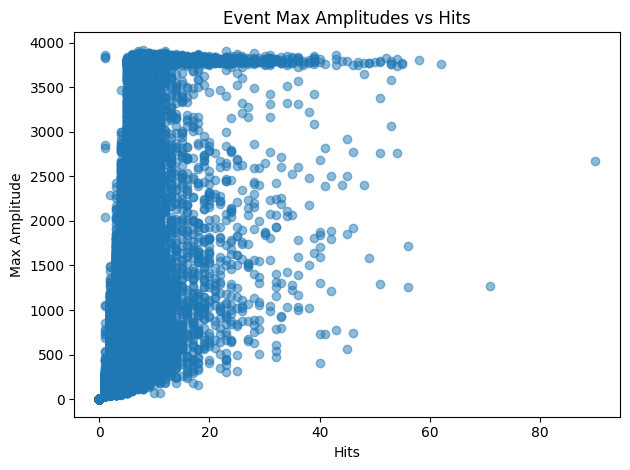

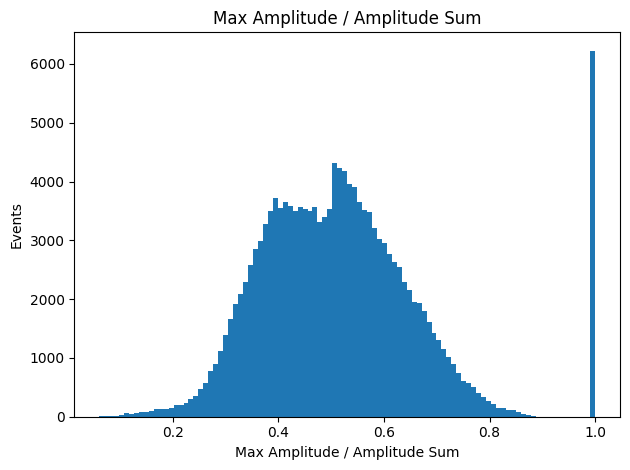

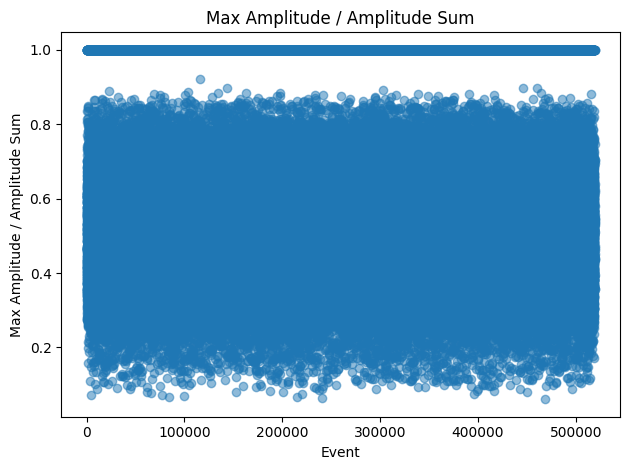

In [7]:
det.dream_data.plot_noise_metric()

Connector 5 Dead Strips: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Connector 6 Dead Strips: []
Connector 7 Dead Strips: [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154]
Connector 8 Dead Strips: []


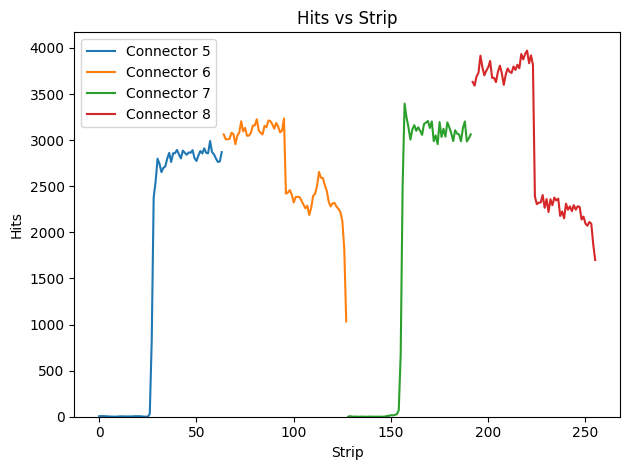

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

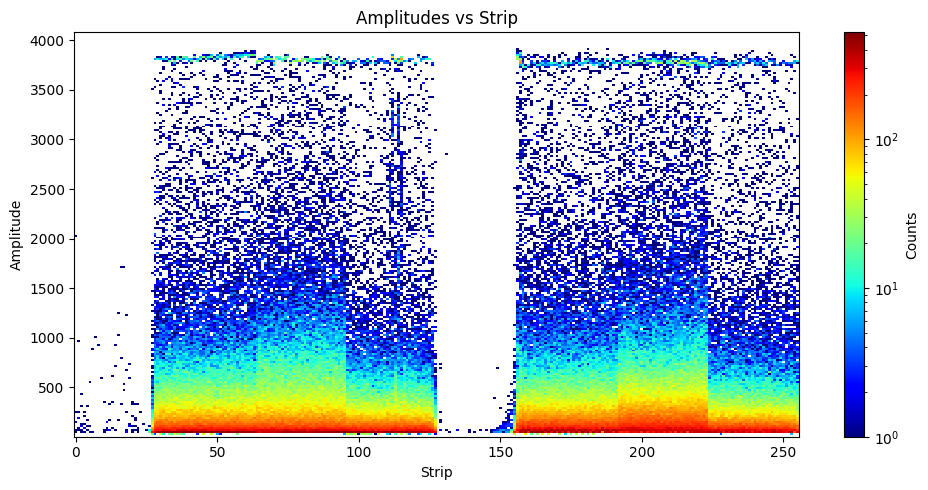

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

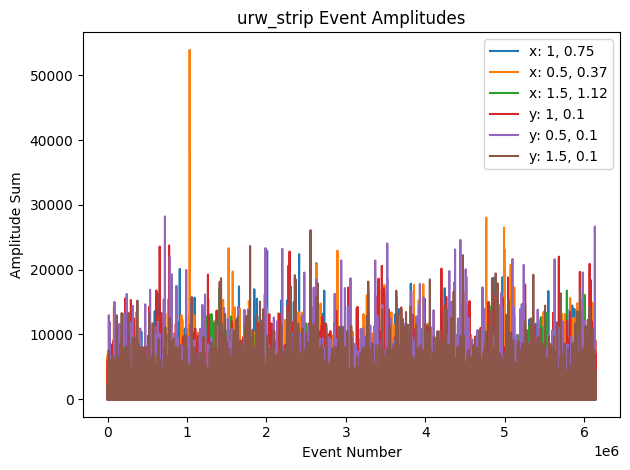

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

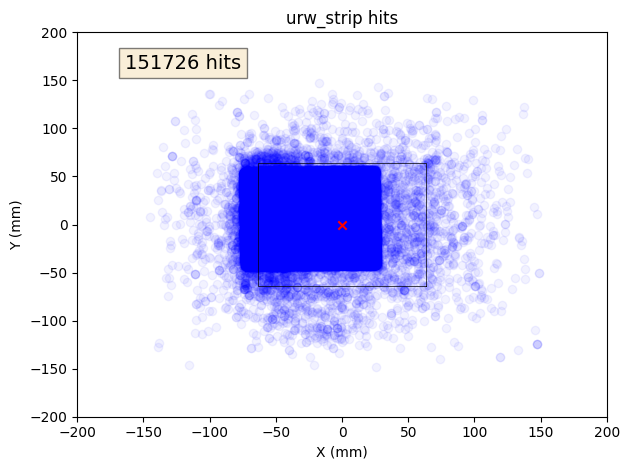

In [11]:
plot_ray_hits_2d(det, ray_data)

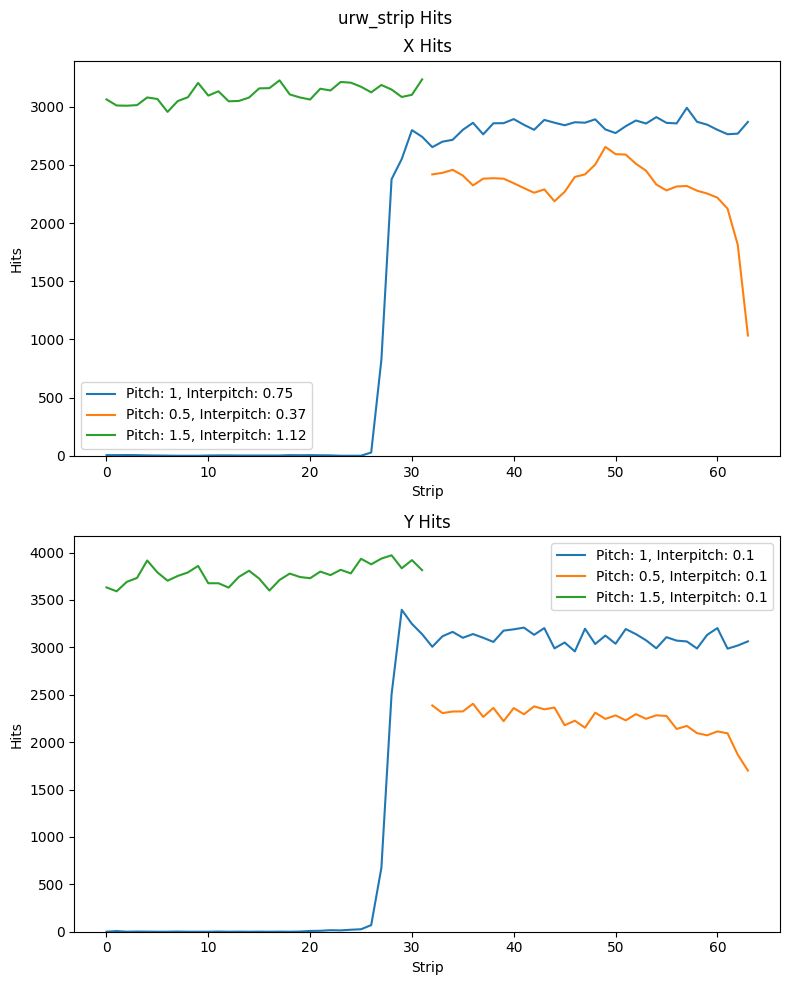

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

519335


In [14]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

z: 794.0
z: 794.3448275862069
z: 794.6896551724138
z: 795.0344827586207
z: 795.3793103448276
z: 795.7241379310345
z: 796.0689655172414
z: 796.4137931034483
z: 796.7586206896551
z: 797.1034482758621
z: 797.448275862069
z: 797.7931034482758
z: 798.1379310344828
z: 798.4827586206897
z: 798.8275862068965
z: 799.1724137931035
z: 799.5172413793103
z: 799.8620689655172
z: 800.2068965517242
z: 800.551724137931
z: 800.8965517241379
z: 801.2413793103449
z: 801.5862068965517
z: 801.9310344827586
z: 802.2758620689655
z: 802.6206896551724
z: 802.9655172413793
z: 803.3103448275862
z: 803.6551724137931
z: 804.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

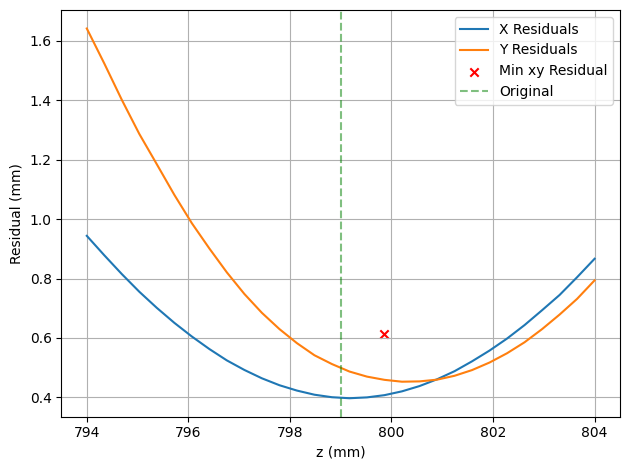

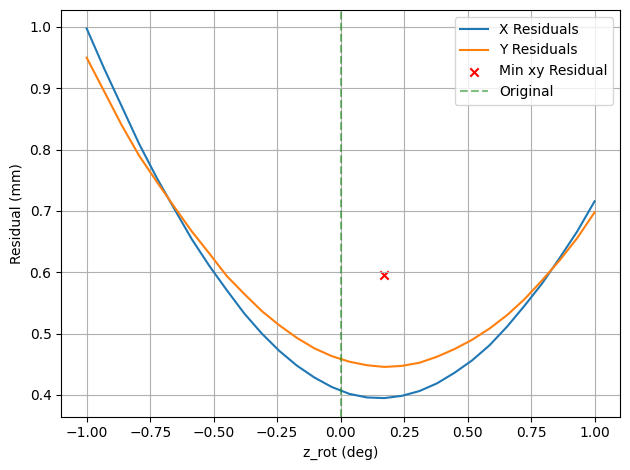

In [15]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

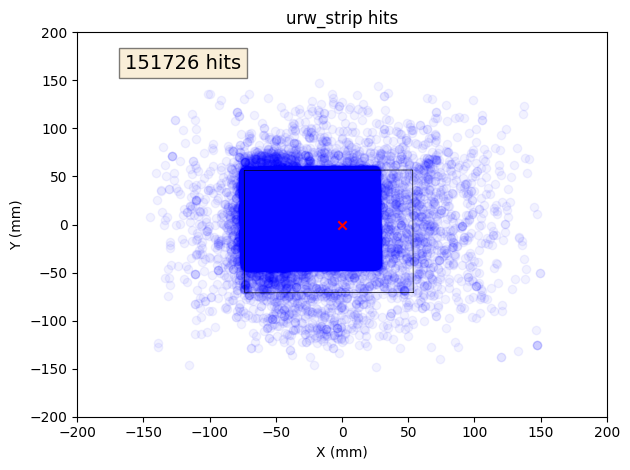

In [16]:
plot_ray_hits_2d(det, ray_data)

Pre-filtered rays: 1630227
All rays: 354564


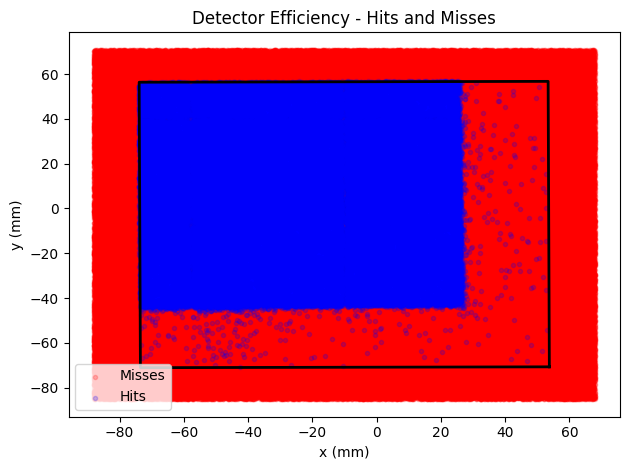

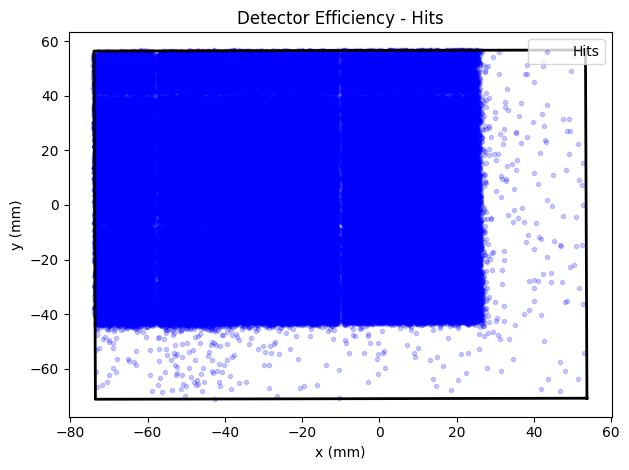

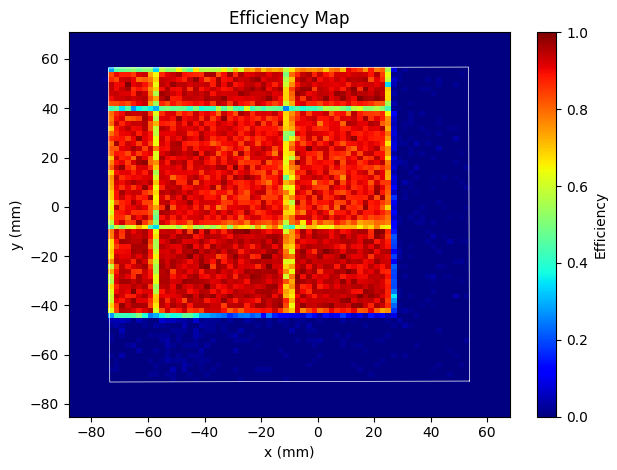

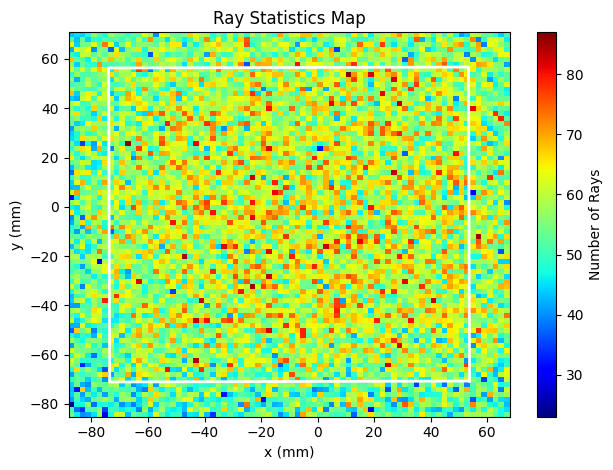

In [17]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

/home/dylan/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:1207: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


X Residuals: Mean=-7μm, Std=360μm
Y Residuals: Mean=-12μm, Std=409μm
X Residuals: Mean=27μm, Std=444μm
Y Residuals: Mean=3μm, Std=450μm
X Residuals: Mean=6μm, Std=468μm
Y Residuals: Mean=5μm, Std=443μm
X Residuals: Mean=-13μm, Std=394μm
Y Residuals: Mean=0μm, Std=373μm


/home/dylan/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:1198: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


X Residuals: Mean=26μm, Std=458μm
Y Residuals: Mean=-18μm, Std=433μm
X Residuals: Mean=-6μm, Std=507μm
Y Residuals: Mean=24μm, Std=405μm
X Residuals: Mean=-16μm, Std=360μm
Y Residuals: Mean=-6μm, Std=511μm
X Residuals: Mean=26μm, Std=441μm
Y Residuals: Mean=-4μm, Std=534μm
X Residuals: Mean=-4μm, Std=472μm
Y Residuals: Mean=3μm, Std=533μm


(-0.003780551919140738,
 0.00216246418358726,
 0.3663916433619187,
 0.42540724349302617)

/home/dylan/PycharmProjects/saclay_micromegas/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dylan/PycharmProjects/saclay_micromegas/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


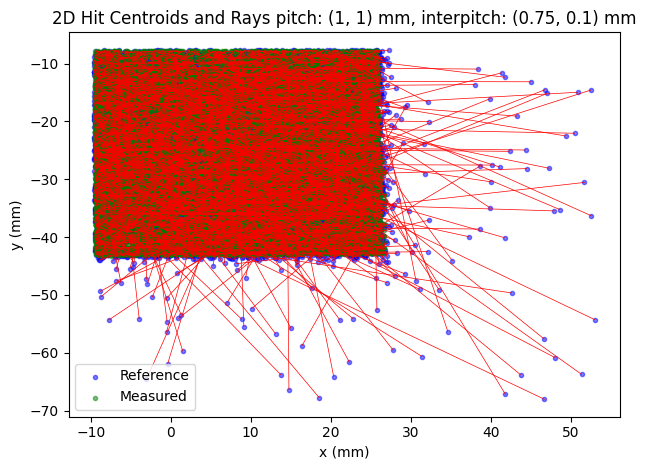

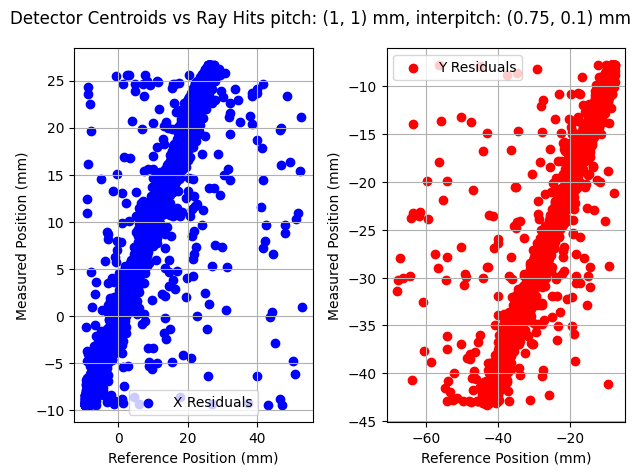

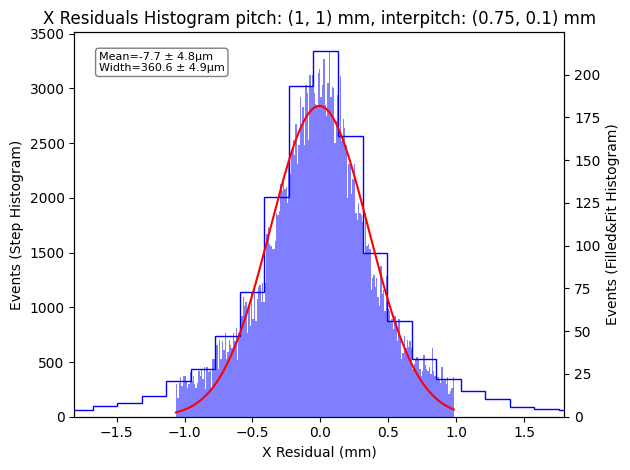

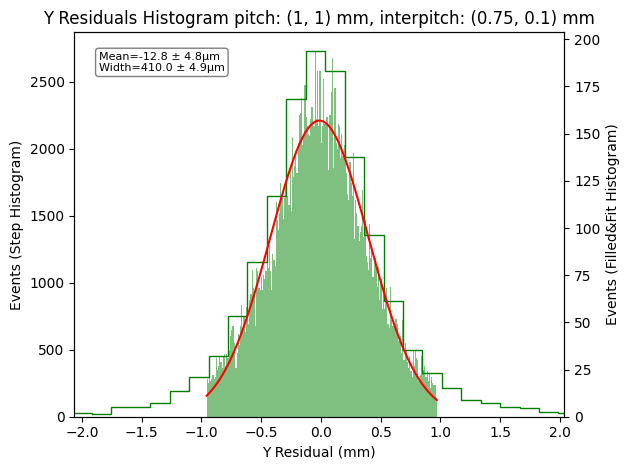

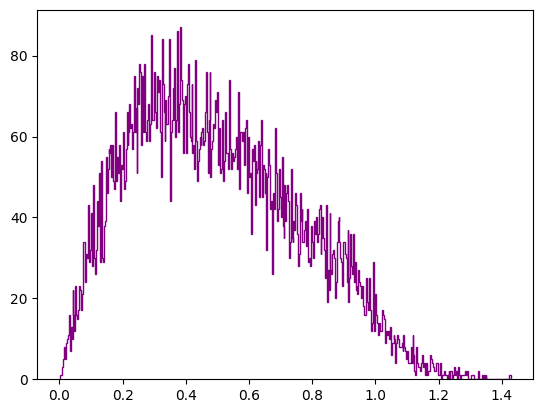

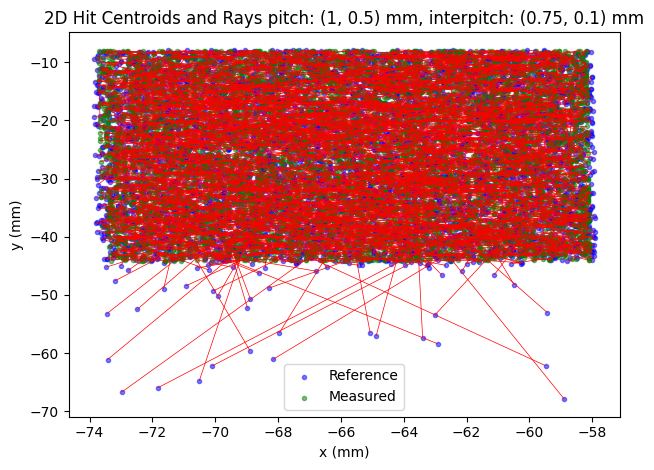

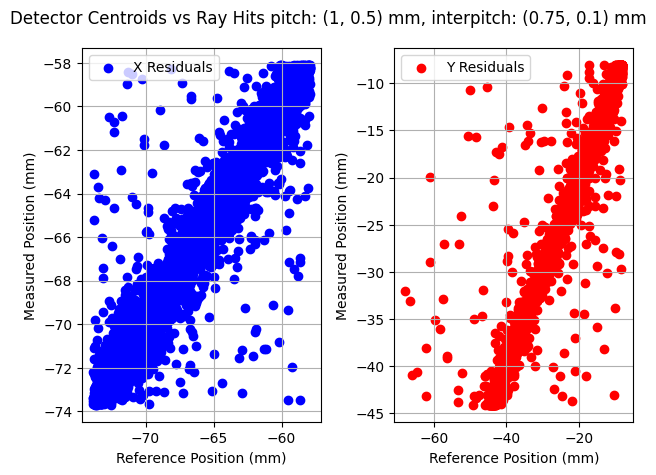

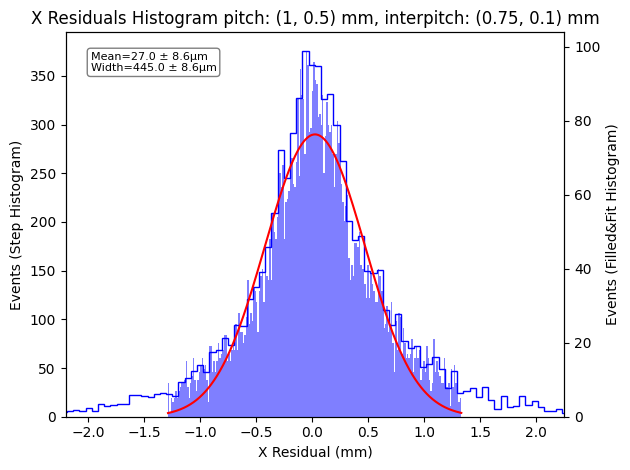

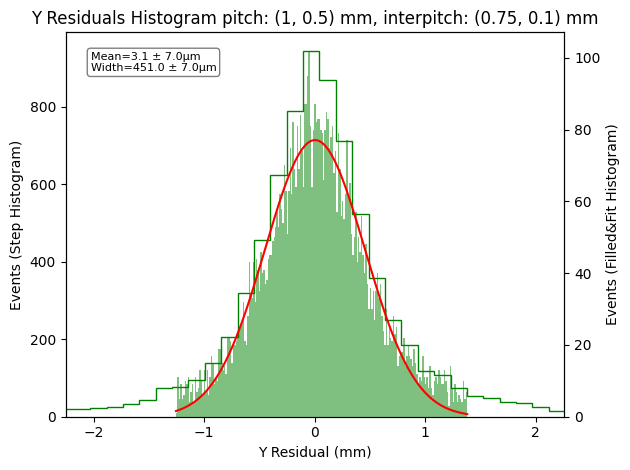

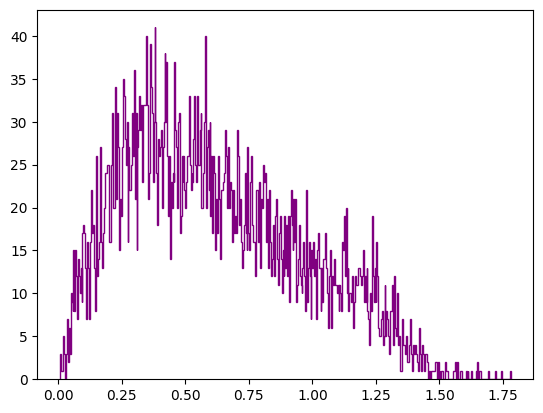

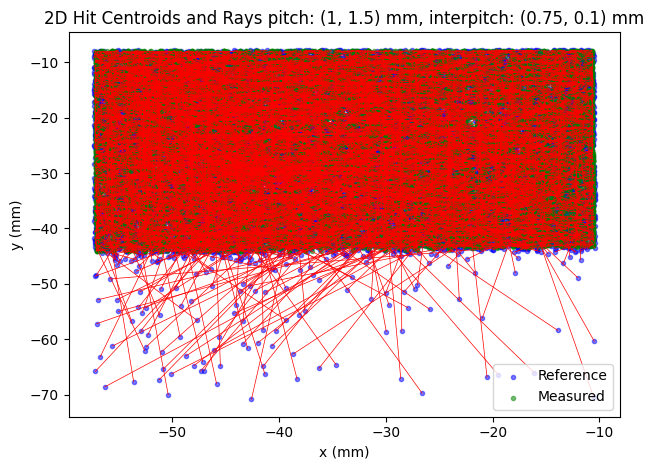

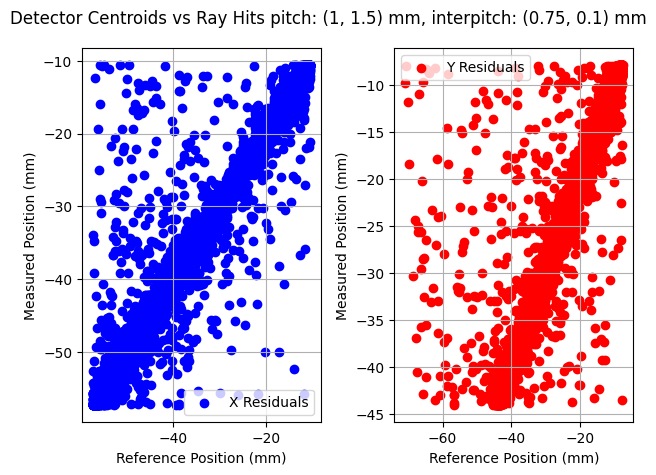

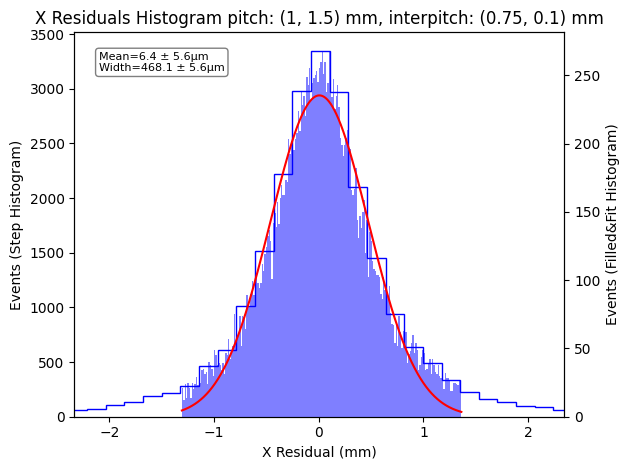

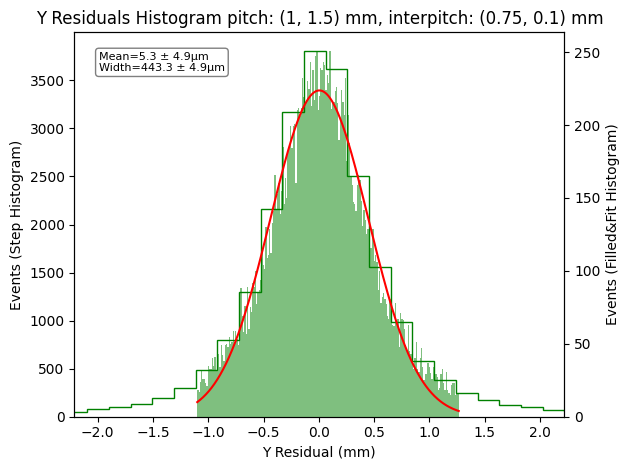

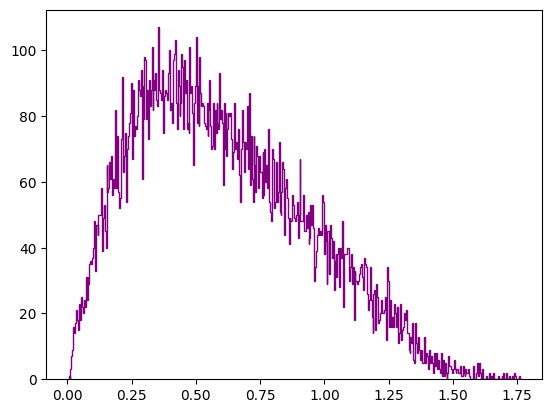

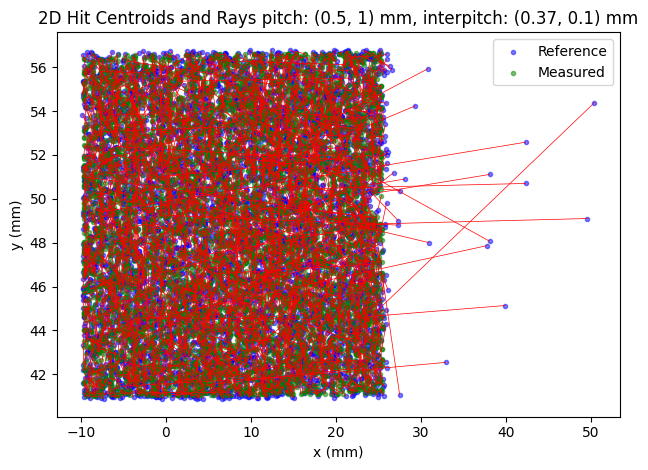

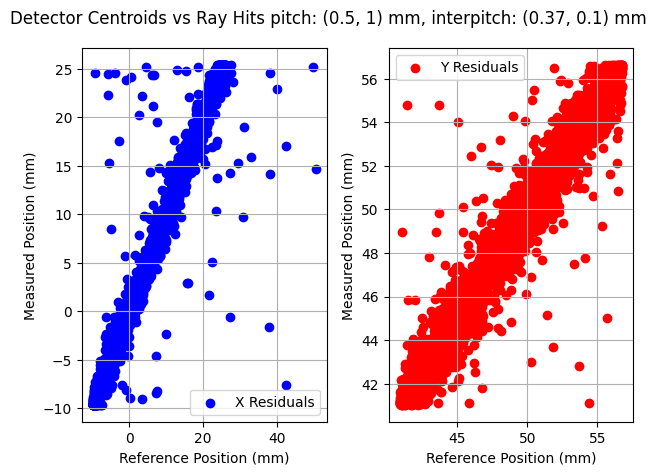

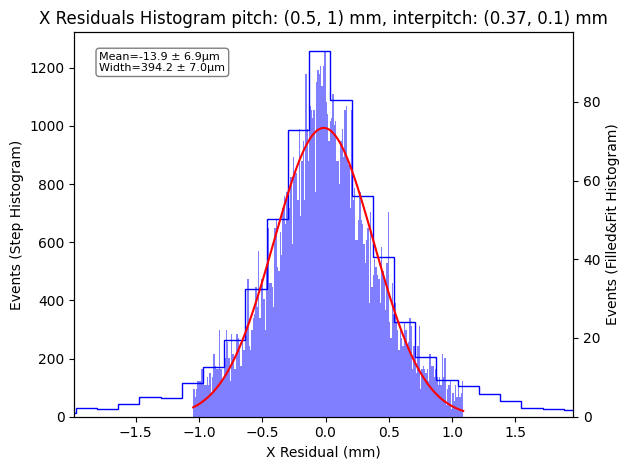

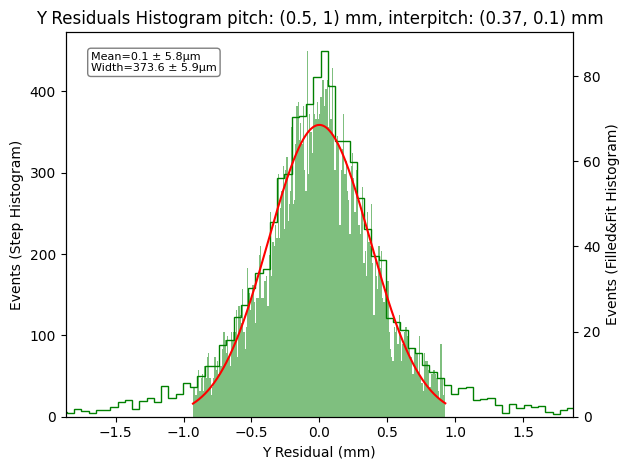

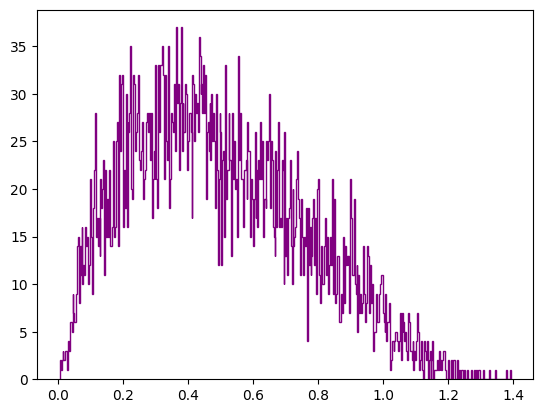

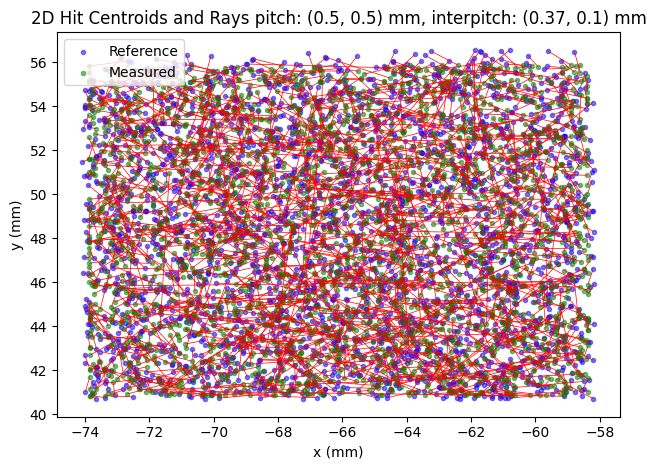

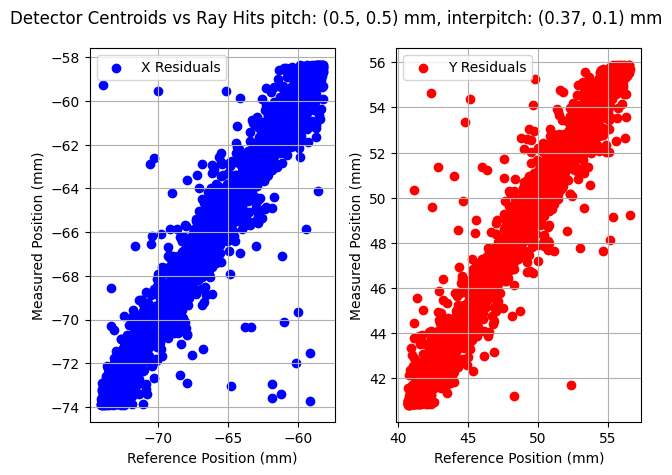

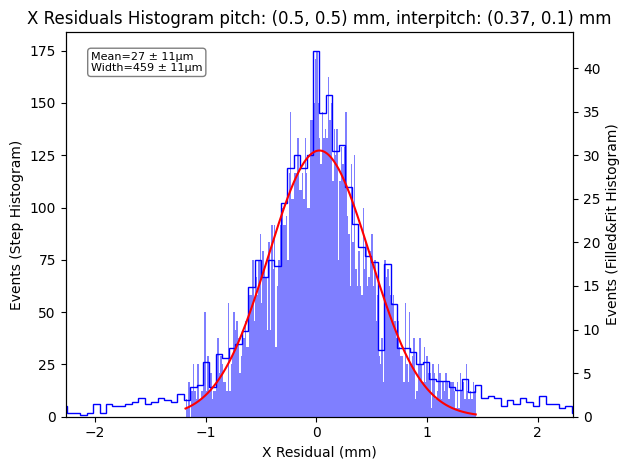

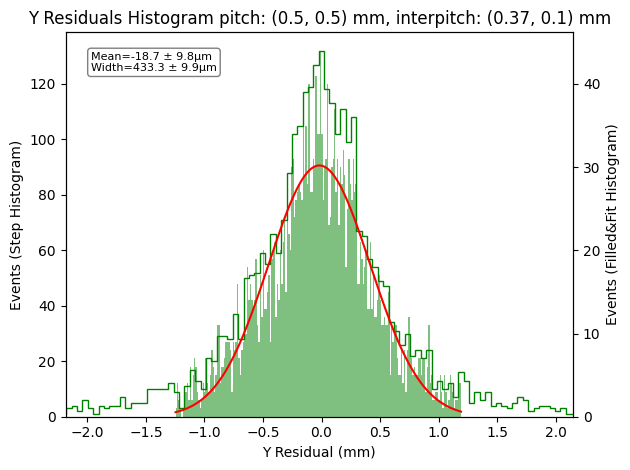

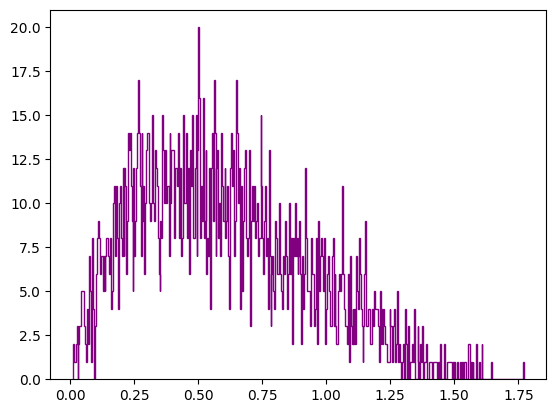

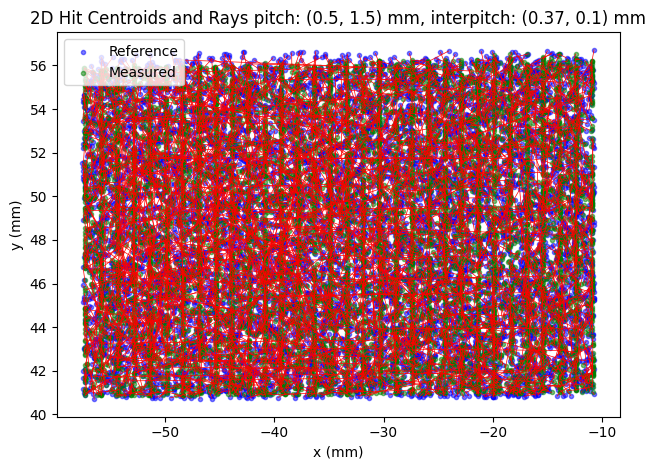

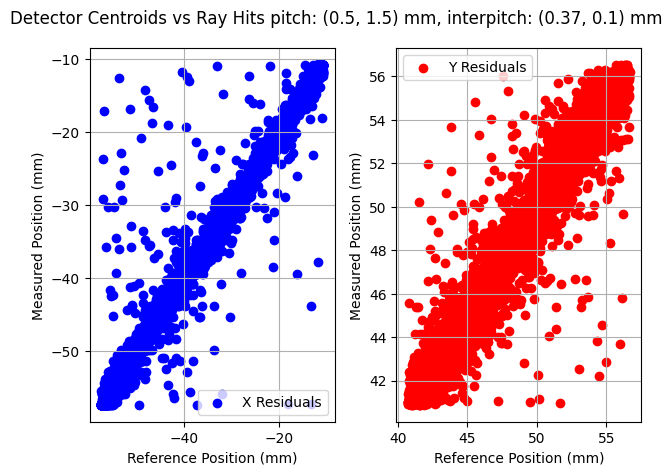

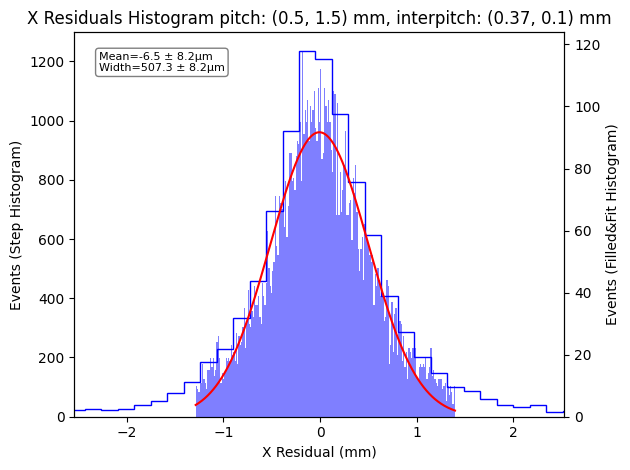

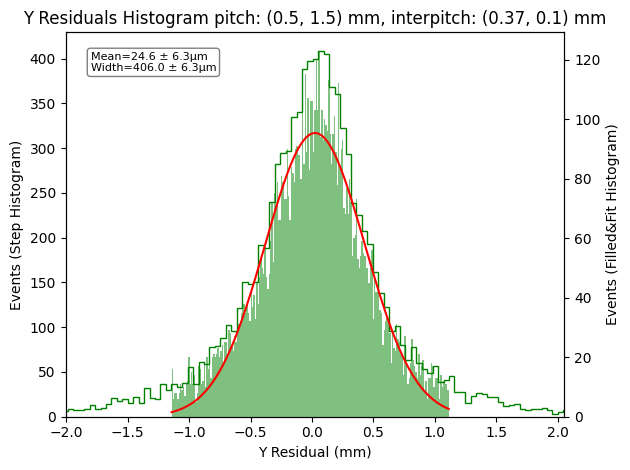

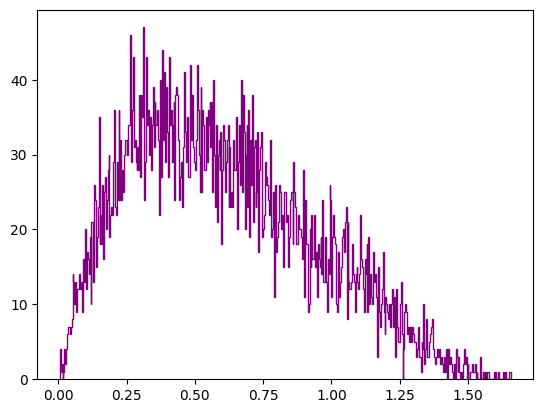

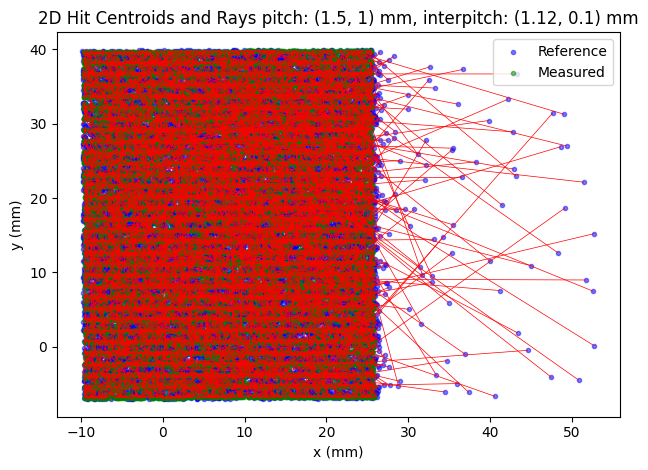

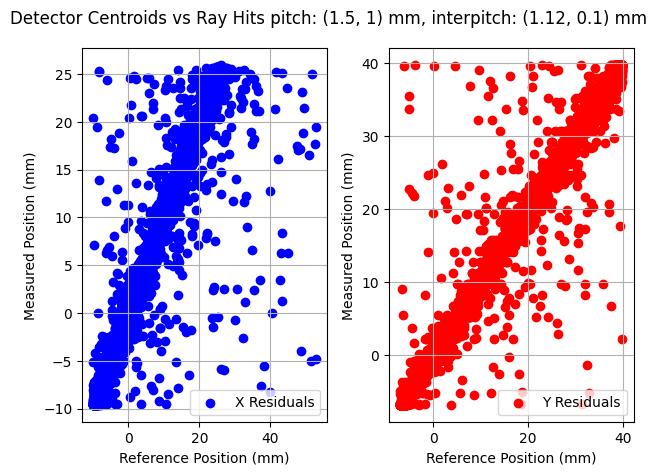

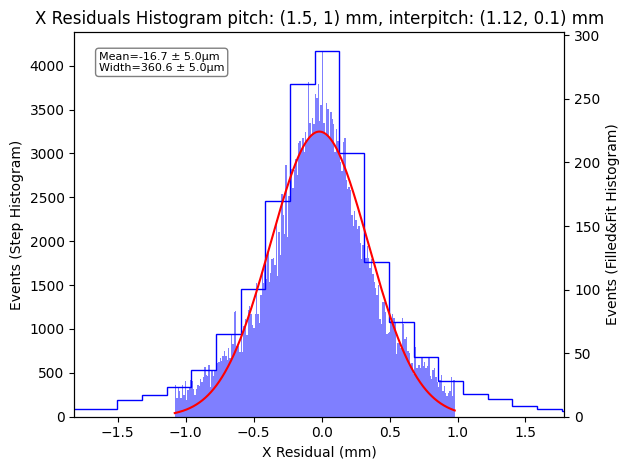

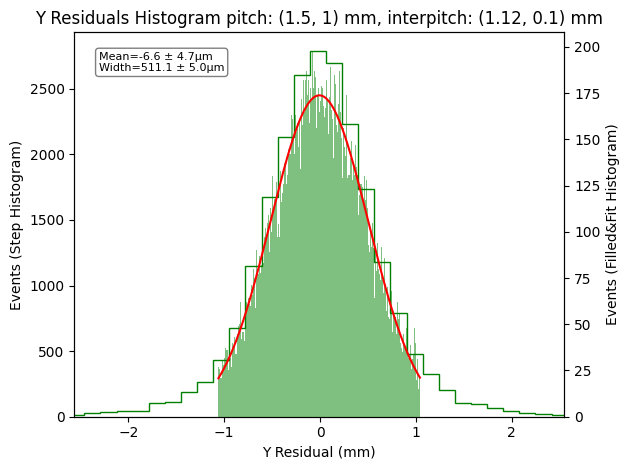

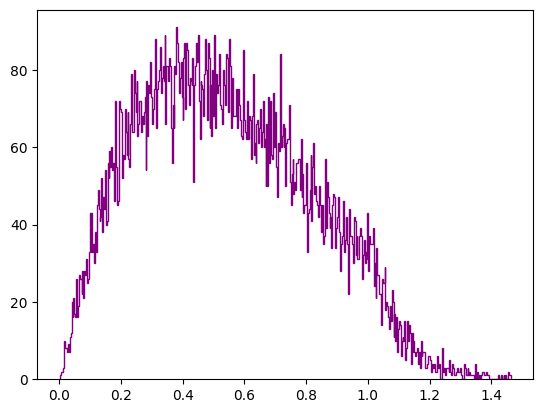

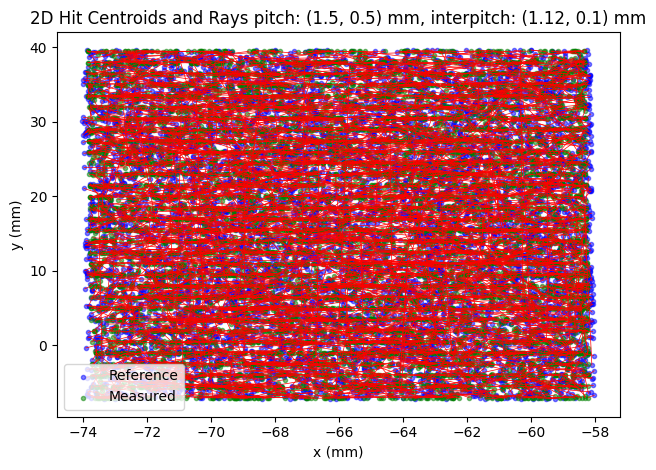

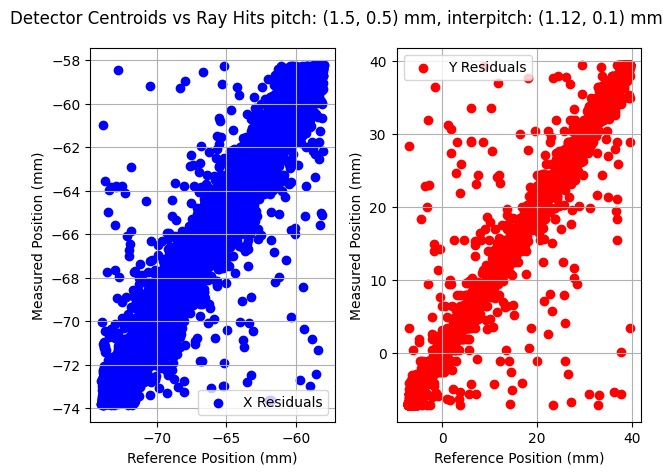

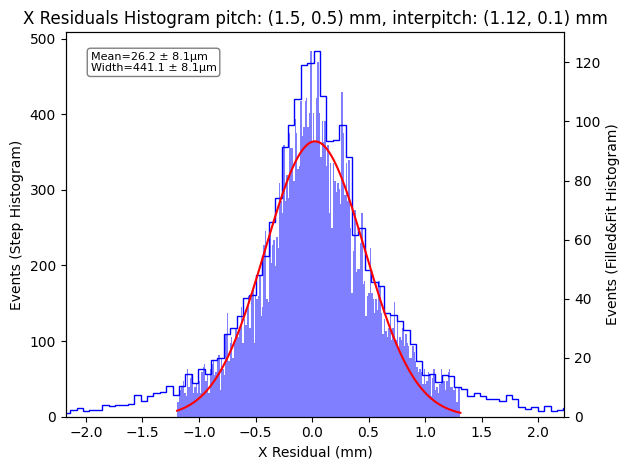

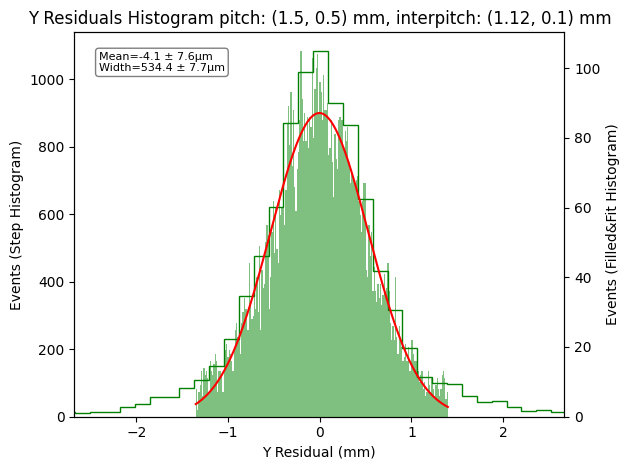

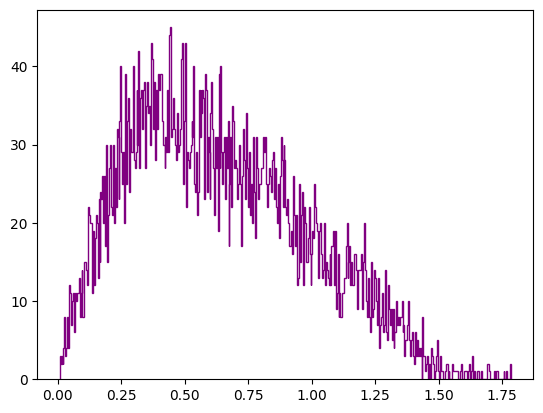

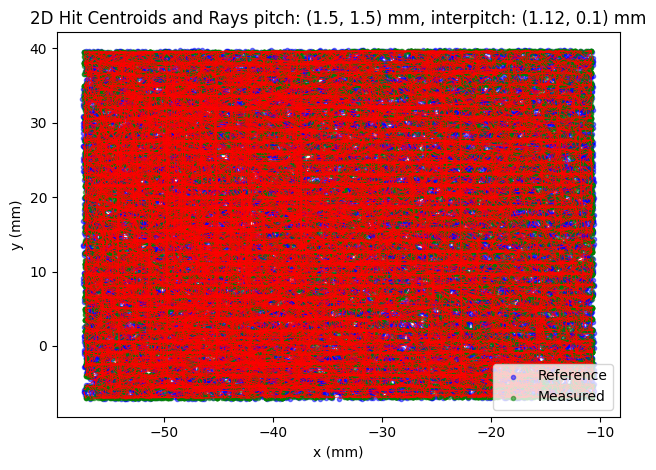

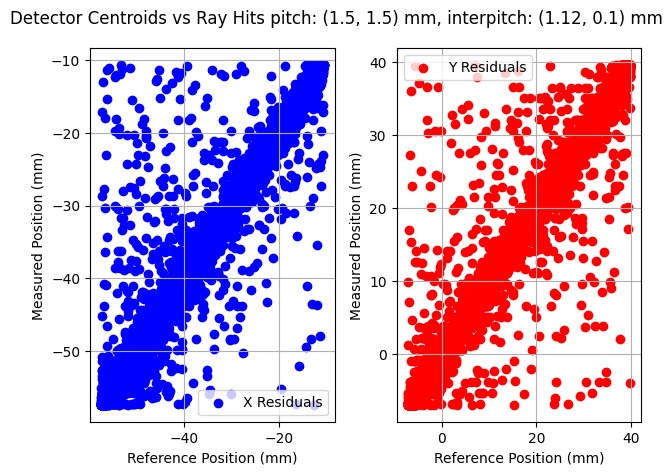

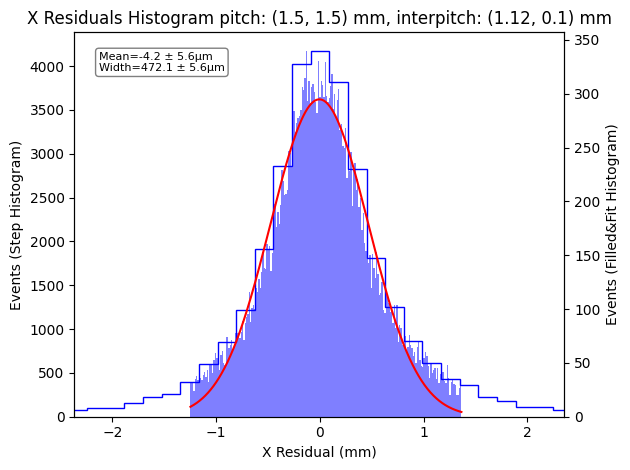

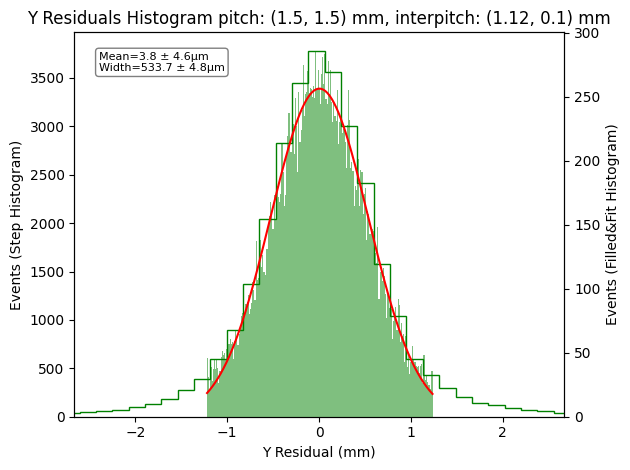

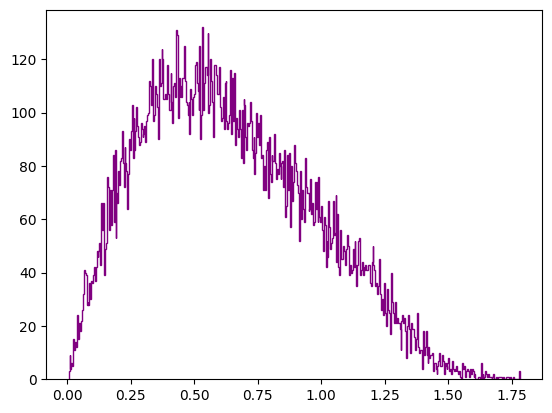

In [18]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [19]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

  pitch_x pitch_y interpitch_x interpitch_y    x_mean  x_mean_err    y_mean  \
0       1       1         0.75          0.1 -0.007687    0.004831  0.409969   
1       1     0.5         0.75          0.1  0.027031    0.008607  0.450991   
2       1     1.5         0.75          0.1  0.006433    0.005586  0.443295   
3     0.5       1         0.37          0.1 -0.013888    0.006932  0.373573   
4     0.5     0.5         0.37          0.1  0.026624    0.010940  0.433317   
5     0.5     1.5         0.37          0.1 -0.006502    0.008156  0.405967   
6     1.5       1         1.12          0.1 -0.016735    0.004987  0.511091   
7     1.5     0.5         1.12          0.1  0.026242    0.008057  0.534361   
8     1.5     1.5         1.12          0.1 -0.004225    0.005557  0.533712   

   y_mean_err     x_std  x_std_err     y_std  y_std_err  
0    0.004928  0.360559   0.004851  0.409969   0.004928  
1    0.006972  0.444956   0.008627  0.450991   0.006972  
2    0.004939  0.468067   0.005607 

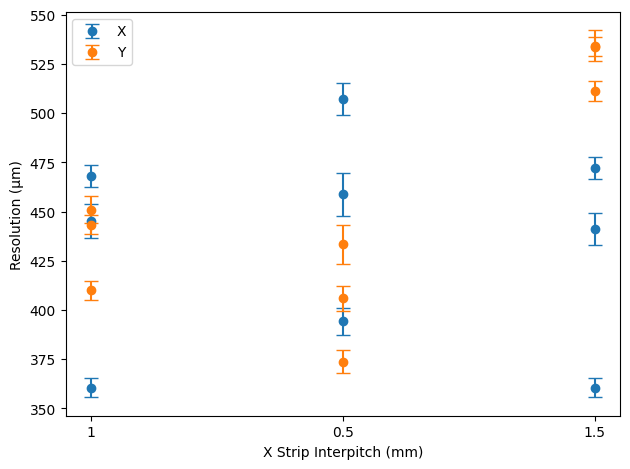

In [20]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['pitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['pitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Pitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

New stuff above